In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam

In [2]:
# generate random data
feat_dim = 16
x_train = np.random.randn(500, feat_dim)
x_val = np.random.randn(100, feat_dim)

In [3]:
# get autoencoder
inputs = Input(shape=(feat_dim,))
latent = Dense(8, activation="tanh", kernel_initializer="GlorotNormal")(inputs)
outputs = Dense(feat_dim, activation=None, kernel_initializer="GlorotNormal")(latent)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 136       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


In [4]:
# model config
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='mse')

In [5]:
# start training
history = model.fit(x_train, x_train, epochs=200, batch_size=32)

Epoch 1/200
16/16 [==============================] - 0s 1ms/step - loss: 1.1684
Epoch 2/200
16/16 [==============================] - 0s 903us/step - loss: 1.1066
Epoch 3/200
16/16 [==============================] - 0s 870us/step - loss: 1.0515
Epoch 4/200
16/16 [==============================] - 0s 965us/step - loss: 1.0021
Epoch 5/200
16/16 [==============================] - 0s 1000us/step - loss: 0.9574
Epoch 6/200
16/16 [==============================] - 0s 954us/step - loss: 0.9170
Epoch 7/200
16/16 [==============================] - 0s 961us/step - loss: 0.8810
Epoch 8/200
16/16 [==============================] - 0s 1ms/step - loss: 0.8480
Epoch 9/200
16/16 [==============================] - 0s 1ms/step - loss: 0.8185
Epoch 10/200
16/16 [==============================] - 0s 2ms/step - loss: 0.7912
Epoch 11/200
16/16 [==============================] - 0s 2ms/step - loss: 0.7667
Epoch 12/200
16/16 [==============================] - 0s 1ms/step - loss: 0.7444
Epoch 13/200
16/16 [====

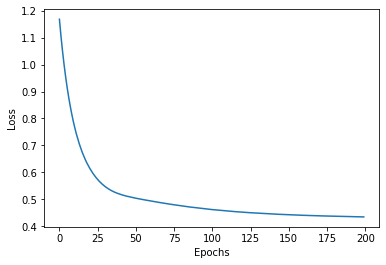

In [6]:
# training loss
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
# get reconstuction error of x_val
x_val_recon = model.predict(x_val)
error = np.sqrt(np.sum(np.square(x_val_recon - x_val), axis=1))

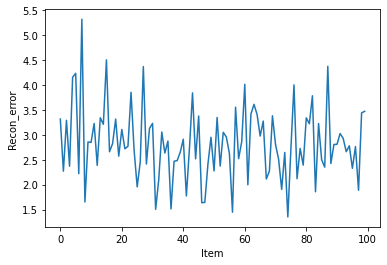

In [9]:
# show results
plt.plot(error)
plt.xlabel("Item")
plt.ylabel("Recon_error")
plt.show()